In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings                        
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline

In [4]:
store = pd.read_csv('SampleSuperstore.csv')

In [5]:
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
store.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
store.shape

(9994, 13)

# Exploratory Data Analysis

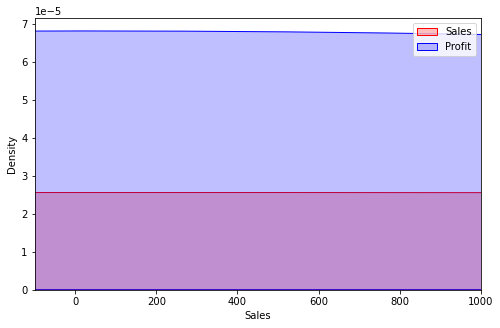

In [9]:
plt.figure(figsize=(8,5))
sns.kdeplot(store['Sales'], color='red', label='Sales', shade=True, bw=25)
sns.kdeplot(store['Profit'], color='blue', label='Profit', shade=True, bw=25)
plt.xlim([-100, 1000])
plt.legend()

profit is more than that of sale but there are some areas where profit could be increased

Analysis using Pairplot of each column

1. Based on the Category

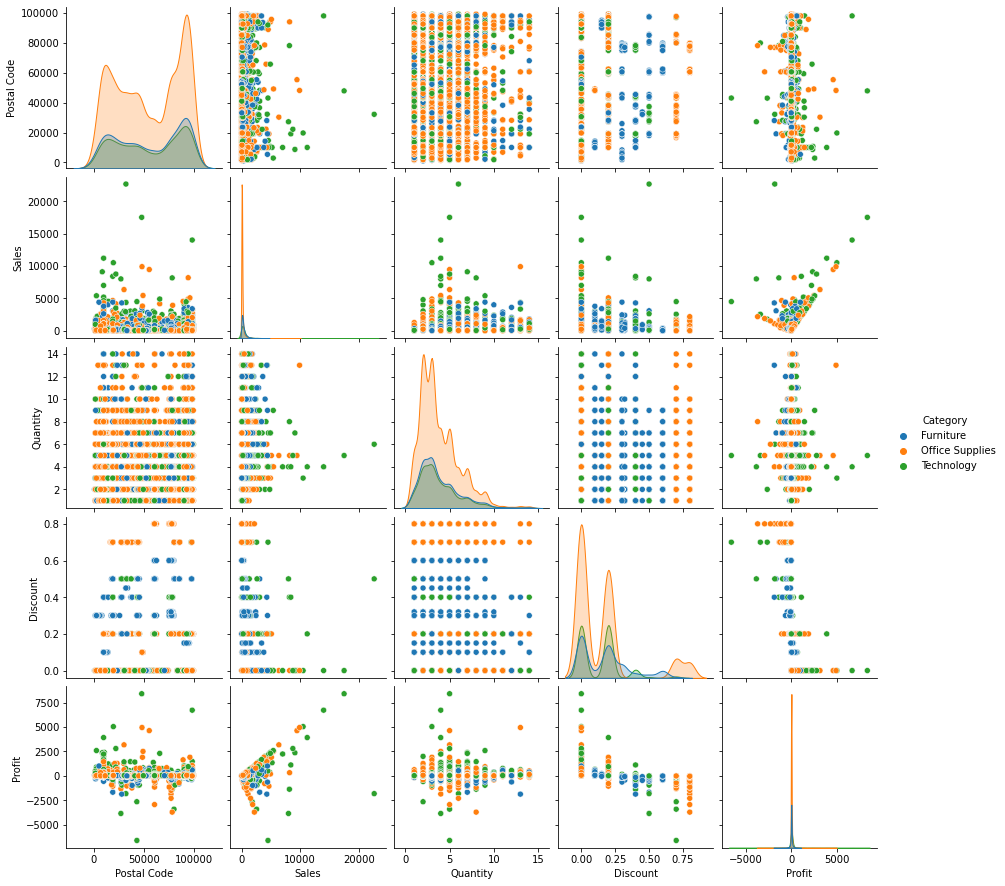

In [10]:
sns.pairplot(store, hue='Category')

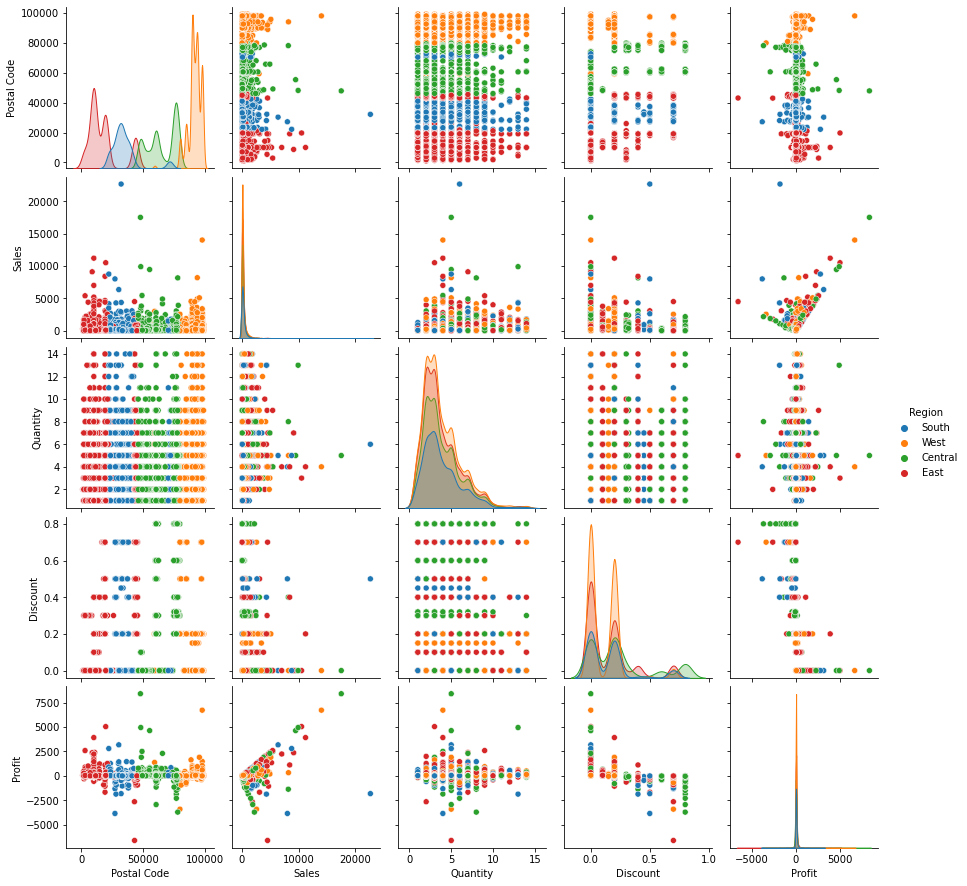

In [11]:
sns.pairplot(store, hue='Region')

In [12]:
store.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


<AxesSubplot:>

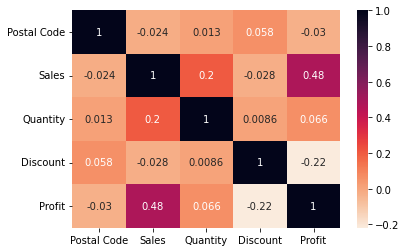

In [13]:
sns.heatmap(store.corr(), cmap='rocket_r', annot=True)

### Form Above Heatmap:

* Sales and Profit are Moderately Correlated.
* Discount and Profit are Negatively Correlated.
* Quantity and Profit are less Moderately correlated.

## Count plot of each column

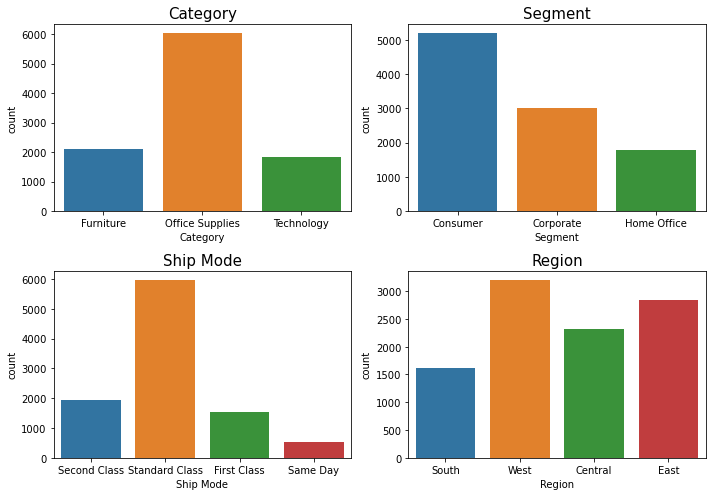

In [14]:
fig, axes=plt.subplots(nrows=2, ncols=2, figsize=(10,7))

sns.countplot(store['Category'],ax=axes[0][0])
sns.countplot(store['Segment'],ax=axes[0][1])
sns.countplot(store['Ship Mode'],ax=axes[1][0])
sns.countplot(store['Region'],ax=axes[1][1])
axes[0][0].set_title('Category', fontsize=15)
axes[0][1].set_title('Segment', fontsize=15)
axes[1][0].set_title('Ship Mode', fontsize=15)
axes[1][1].set_title('Region', fontsize=15)

plt.tight_layout()

Text(0.5, 1.0, 'Sub-Category')

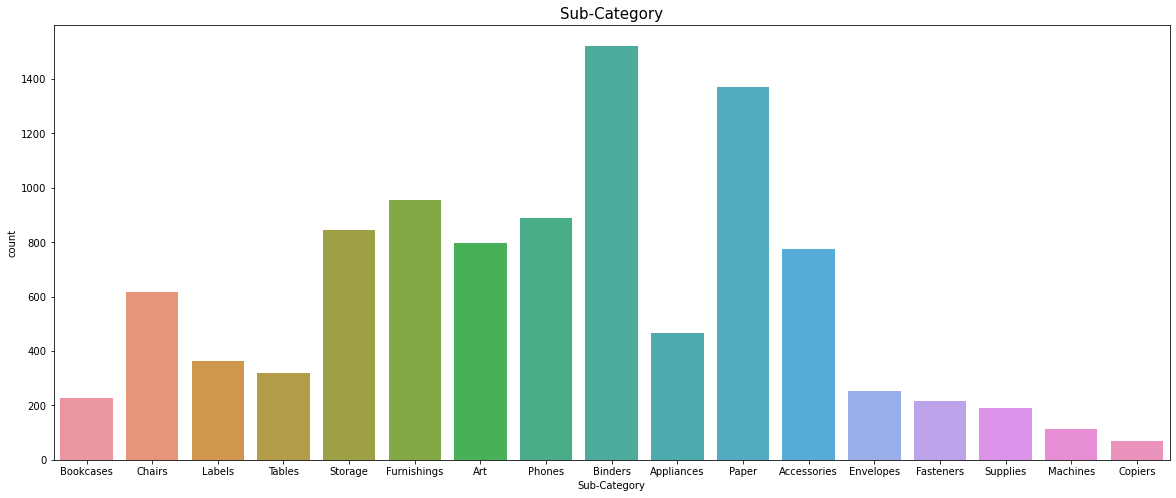

In [15]:
plt.figure(figsize=(20,8))
sns.countplot(store['Sub-Category'])
plt.title('Sub-Category', fontsize=15)

Text(0.5, 1.0, 'Quantity')

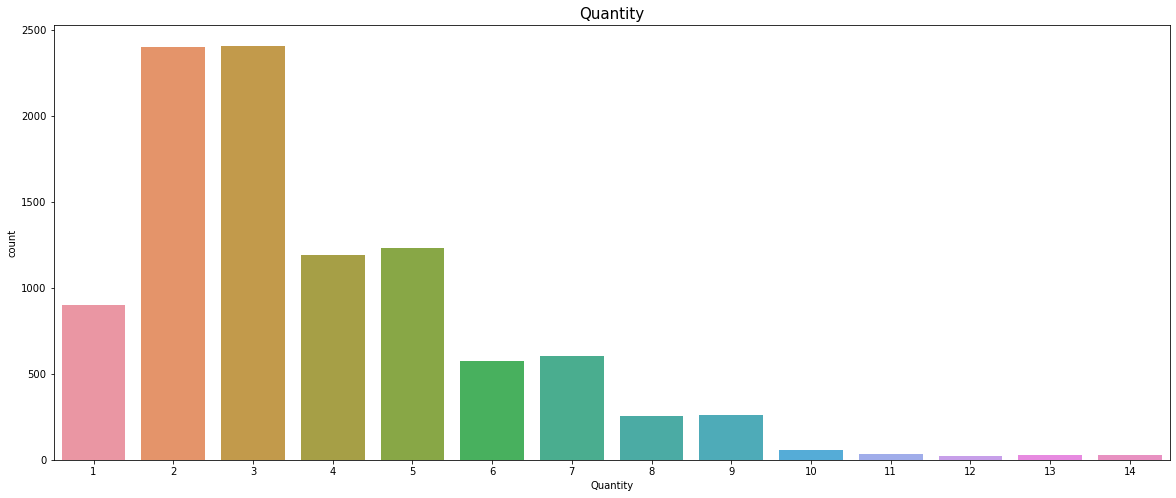

In [16]:
plt.figure(figsize=(20,8))
sns.countplot(store['Quantity'])
plt.title('Quantity', fontsize=15)

Text(0.5, 1.0, 'Discount')

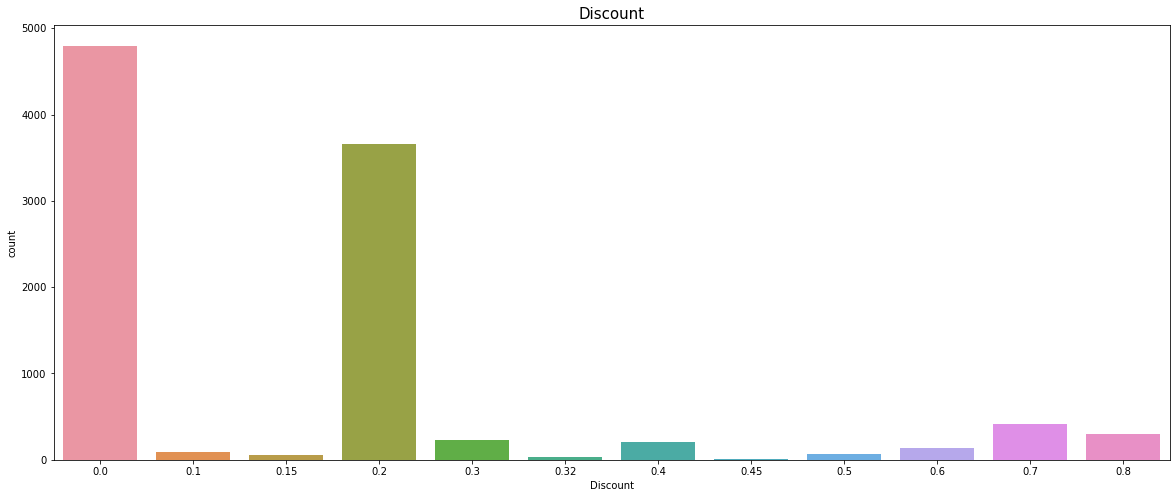

In [17]:
plt.figure(figsize=(20,8))
sns.countplot(store['Discount'])
plt.title('Discount', fontsize=15)

### Distribution of the data using the plot

Text(0.5, 1.0, 'Discount Distribution')

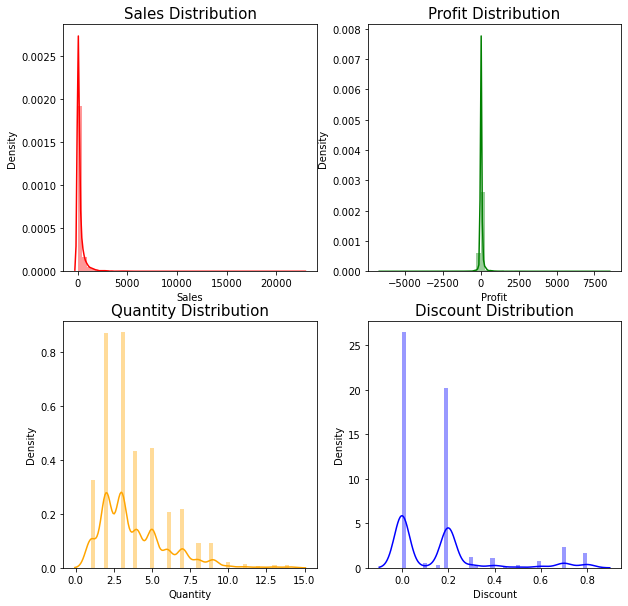

In [18]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize = (10,10))
sns.distplot(store['Sales'], color = 'red', ax = axes[0][0])
sns.distplot(store['Profit'], color = 'green', ax = axes[0][1])
sns.distplot(store['Quantity'], color = 'orange', ax = axes[1][0])
sns.distplot(store['Discount'], color = 'blue', ax = axes[1][1])
axes[0][0].set_title('Sales Distribution', fontsize = 15)
axes[0][1].set_title('Profit Distribution', fontsize = 15)
axes[1][0].set_title('Quantity Distribution', fontsize = 15)
axes[1][1].set_title('Discount Distribution', fontsize = 15)

### Statewise Deal Analysis

In [19]:
store['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [20]:
store1 = store['State'].value_counts()
store1.head(10)

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

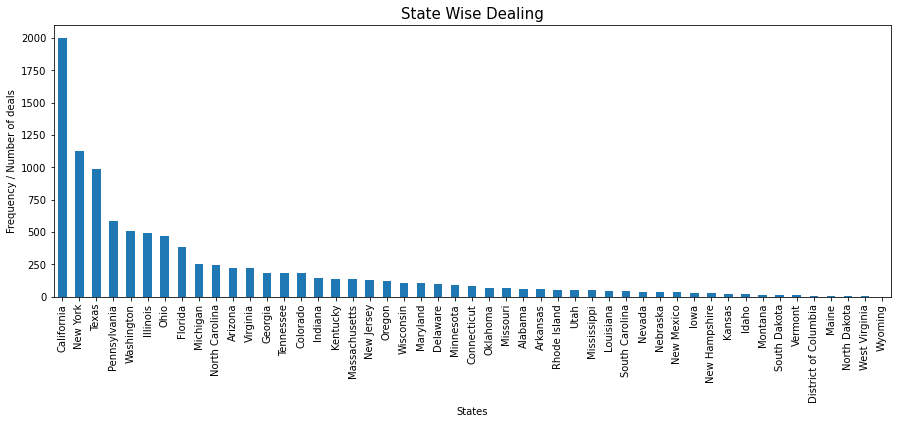

In [21]:
store1.plot(kind='bar', figsize=(15, 5))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('States')

plt.title('State Wise Dealing', fontsize = 15)
plt.show()

###  City Wise analysis of the dealing


In [22]:
store2 = store['City'].value_counts()
store2 = store2.head(50)

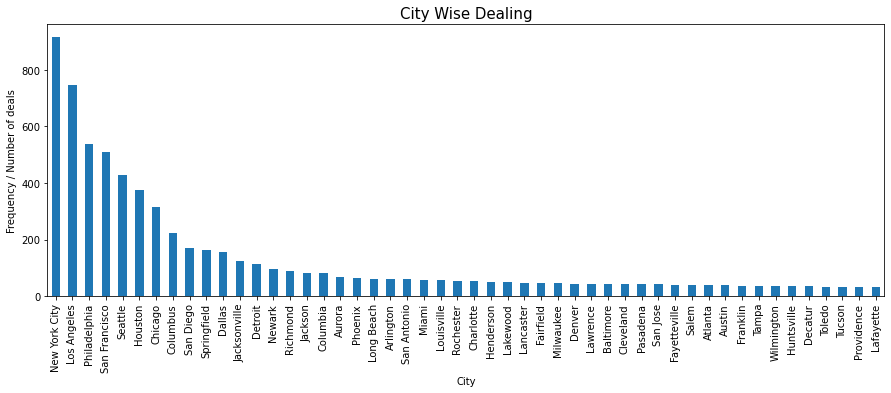

In [23]:
store2.plot(kind='bar', figsize=(15, 5))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('City')

plt.title('City Wise Dealing', fontsize = 15)
plt.show()

In [24]:
store['City'].value_counts().mean()

18.821092278719398

### Segment wise analysis of Profit, Discount and sell

In [25]:
store['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [26]:
store_segment = store.groupby(['Segment'])[['Sales', 'Discount', 'Profit']].mean()
store_segment

,Sales,Discount,Profit
Segment,,,
Consumer,223.733644,0.158141,25.836873
Corporate,233.823300,0.158228,30.456667
Home Office,240.972041,0.147128,33.818664


Text(0.5, 1.0, 'Segment wise analysis of Sale, Discount, Profit')

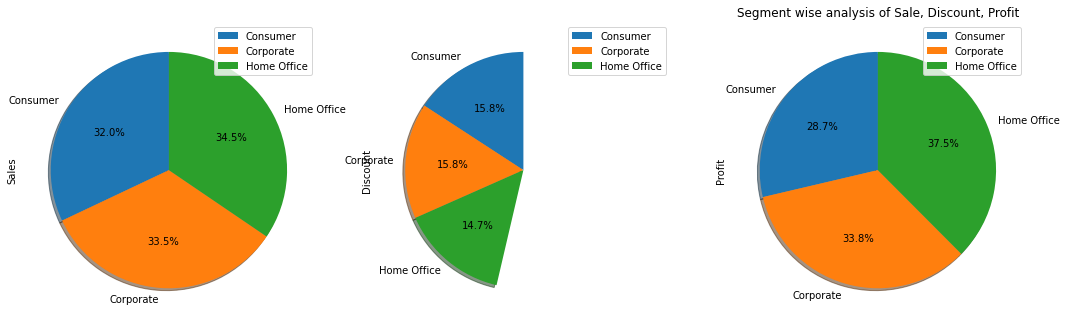

In [27]:
store_segment.plot.pie(subplots=True,
                       autopct = '%1.1f%%',
                       figsize=(18,20),
                       startangle = 90,
                       shadow=True,
                       labels = store_segment.index)

plt.title('Segment wise analysis of Sale, Discount, Profit')

### Statewise analysis of Profit Discount and Sell

In [28]:
store['State'].value_counts().head(10)

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

In [29]:
store_state = store.groupby(['State'])[['Sales', 'Discount', 'Profit']].mean()
store_state.head(10)

,Sales,Discount,Profit
State,,,
Alabama,319.846557,0.000000,94.865989
Arizona,157.508933,0.303571,-15.303235
Arkansas,194.635500,0.000000,66.811452
California,228.729451,0.072764,38.171608
Colorado,176.418231,0.316484,-35.867351
Connecticut,163.223866,0.007317,42.823071
Delaware,285.948635,0.006250,103.930988
District of Columbia,286.502000,0.000000,105.958930
Florida,233.612815,0.299347,-8.875461


### Statewise Profit Analysis

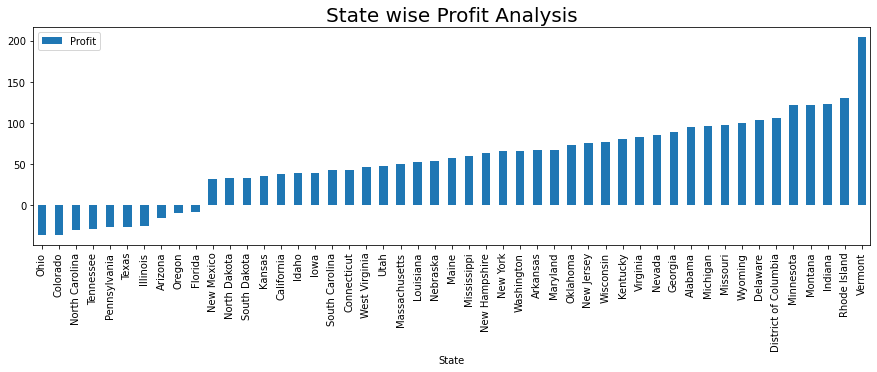

In [32]:
store_state1 = store_state.sort_values('Profit')

store_state1[['Profit']].plot(kind='bar', figsize = (15,4))
plt.title('State wise Profit Analysis', fontsize = 20)
plt.xlabel('State')
plt.show()

### Statewise Sale Analysis

Text(0.5, 1.0, 'State wise analysis of Sale')

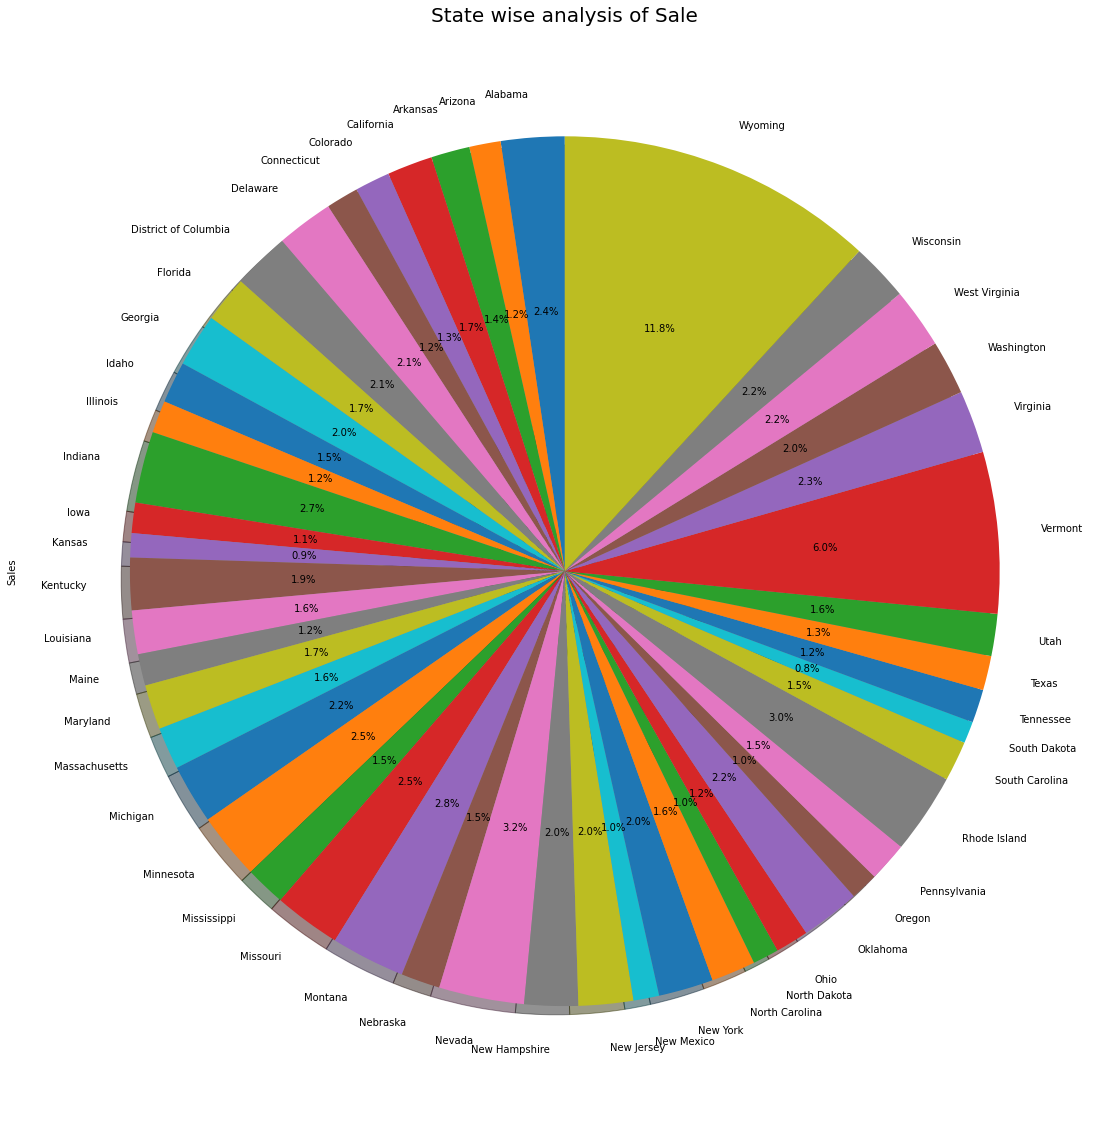

In [33]:
store_state['Sales'].plot(kind='pie',
                       autopct = '%1.1f%%',
                       figsize=(20,20),
                       startangle = 90,
                       shadow=True)

plt.title('State wise analysis of Sale', fontsize=20)

Text(0.5, 1.0, 'State wise analysis of Discount')

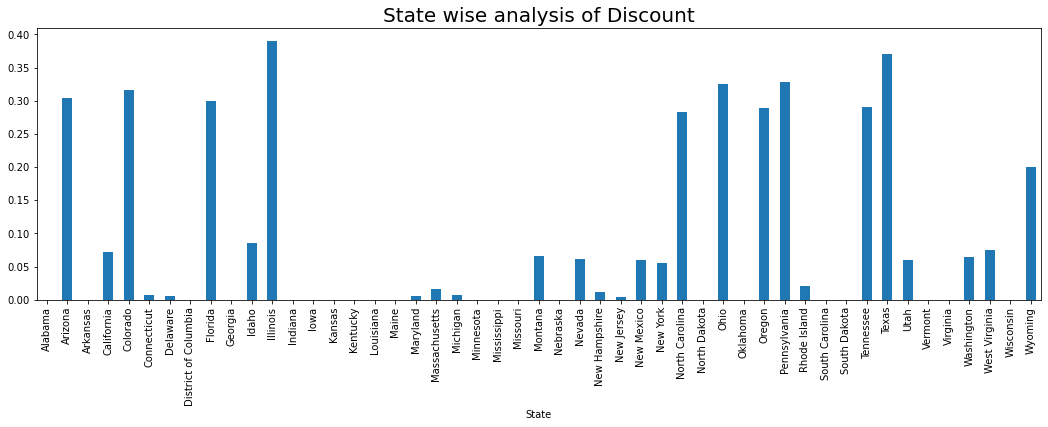

In [34]:
store_state['Discount'].plot(kind='bar', figsize=(18,5))
plt.title('State wise analysis of Discount', fontsize=20)

### Citywise Analysis of the Profit

In [35]:
store_city = store.groupby(['City'])[['Sales', 'Discount', 'Profit']].mean()
store_city = store_city.sort_values('Profit')
store_city.head()

,Sales,Discount,Profit
City,,,
Bethlehem,337.926800,0.380000,-200.619160
Champaign,151.960000,0.600000,-182.352000
Oswego,107.326000,0.600000,-178.709200
Round Rock,693.436114,0.274286,-169.061614
Lancaster,215.031826,0.315217,-157.371052


Text(0.5, 1.0, 'City wise analysis of Sale, Discount, Profit')

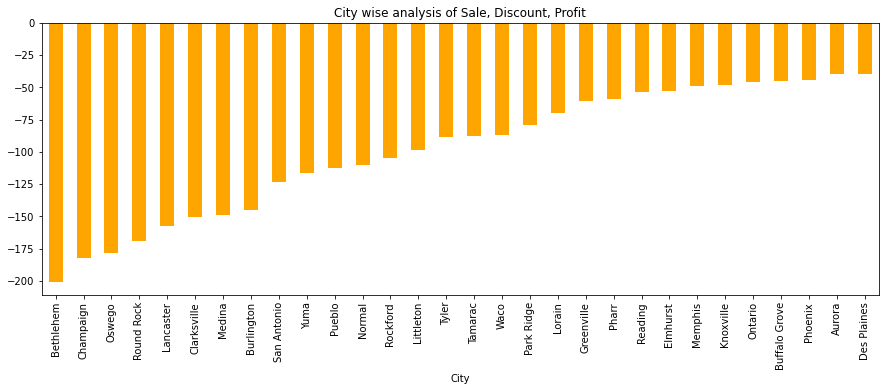

In [37]:
#1. low Profit
store_city['Profit'].head(30).plot(kind='bar', figsize=(15,5), color = 'orange')
plt.title('City wise analysis of Sale, Discount, Profit')

Text(0.5, 1.0, 'City wise analysis of Sale, Discount, Profit')

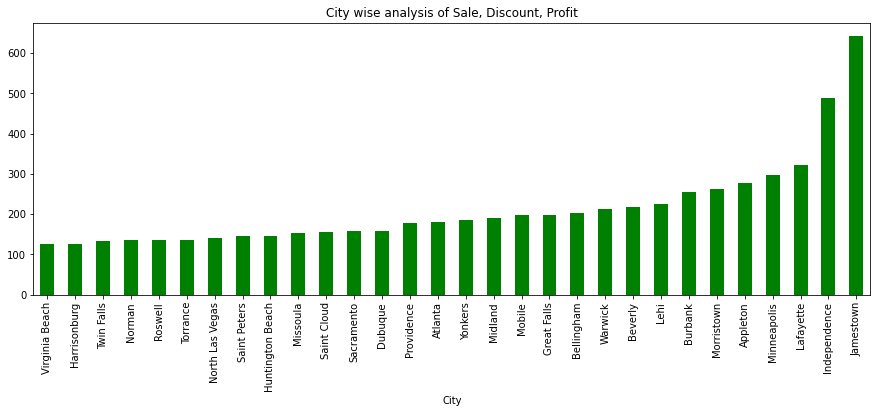

In [39]:
# High Profit
store_city['Profit'].tail(30).plot(kind='bar', figsize=(15,5), color = 'green')
plt.title('City wise analysis of Sale, Discount, Profit')

## Quantity Wise Sales, Profit and Discount Analysis

In [40]:
store_quantity = store.groupby(['Quantity'])[['Sales', 'Discount', 'Profit']].mean()
store_quantity.head(10)

,Sales,Discount,Profit
Quantity,,,
1,59.234632,0.152959,8.276396
2,120.354488,0.154858,16.006831
3,175.201578,0.153329,23.667715
4,271.764059,0.157708,37.131310
5,337.936339,0.157146,40.257394
6,362.101960,0.166556,18.051517
7,395.888393,0.161980,56.579163
8,458.210802,0.171595,42.244342
9,498.083683,0.147946,68.557716


Text(0.5, 1.0, 'Quantitiy wise analysis of Sale, Discount, Profit')

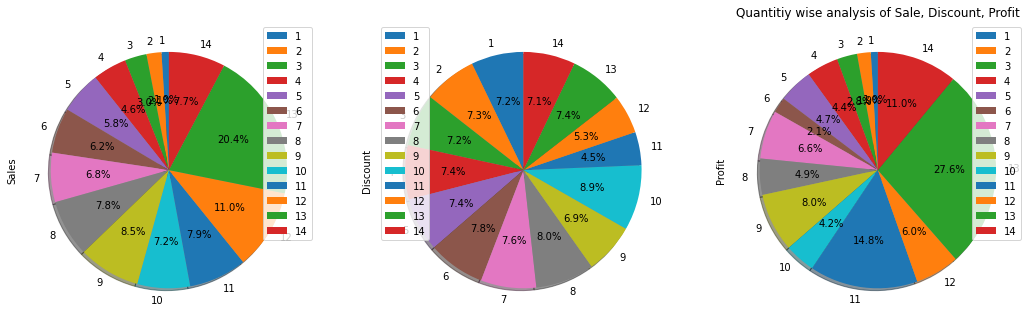

In [41]:
store_quantity.plot.pie(subplots=True,
                       autopct = '%1.1f%%',
                       figsize=(18,20),
                       startangle = 90,
                       shadow=True,
                       labels =store_quantity.index)

plt.title('Quantitiy wise analysis of Sale, Discount, Profit')